In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import plotly.express as px
import plotly.io as pio

from pathlib import Path
import pandas as pd
import itertools

import statsmodels.api as sm
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

pio.renderers.default = "iframe"

In [10]:
base_path = "/data/saturation/central_composite_design/ccd6"
base_path_holdout = "/data/saturation/central_composite_design/ccd6_holdout_larger"

# base_path = "/data/saturation/central_composite_design/ccd9"
# base_path_holdout = "/data/saturation/central_composite_design/ccd9_holdout"

ivs = ["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage", "n_craters_in_study_region"]
iv_labels = {
    "slope": "$b$",
    "effective_radius_multiplier": "$E_{mult}$",
    "r_stat_multiplier": "$E_{ratio}$",
    "min_rim_percentage": "$M_r$",
    "n_craters_in_study_region": "$N_S$",
    "areal_density": "Median $A_d$",
    "information_loss": "Information Loss",
}

In [4]:
stats_df = pd.read_csv(f"{base_path}/sample_500.csv")
stats_df.head()

,simulation_id,slope,r_stat_multiplier,effective_radius_multiplier,min_rim_percentage,crater_id,n_craters_added_in_study_region,n_craters_in_study_region,areal_density,z,za
0,26,0.994019,2.963085,1.903002,0.701006,4710,1000,245,0.125217,-3.594801,-1.772011
1,26,0.994019,2.963085,1.903002,0.701006,9357,2000,358,0.127136,-0.525430,1.984134
2,26,0.994019,2.963085,1.903002,0.701006,14141,3000,356,0.190563,0.096000,4.131280
3,26,0.994019,2.963085,1.903002,0.701006,18813,4000,531,0.134455,-1.316506,1.885393
4,26,0.994019,2.963085,1.903002,0.701006,23429,5000,397,0.178425,-1.680261,2.082134


In [69]:
# Adding information lost
stats_df["information_lost"] = (1 - stats_df.n_craters_in_study_region / stats_df.n_craters_added_in_study_region).fillna(0)

### Visualizing Information Lost

slope                          2.009558
effective_radius_multiplier    1.102783
r_stat_multiplier              2.973672
min_rim_percentage             0.695672
Name: 46490, dtype: float64


Text(0.5, 1.0, 'Simulation 101')

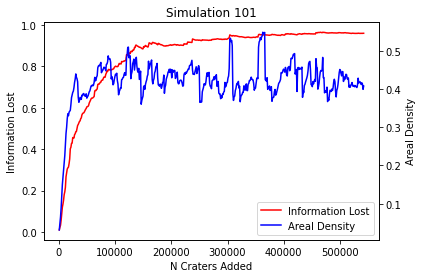

In [70]:
simulation_id = 101
df = stats_df[stats_df.simulation_id == simulation_id]
df.head()

print(df[["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage"]].iloc[0])

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_lost, color='red', label="Information Lost")
ax1.set_ylabel("Information Lost")
ax1.set_xlabel("N Craters Added")

ax2 = ax1.twinx()
plt2 = ax2.plot(df.n_craters_added_in_study_region, df.areal_density, color="blue", label="Areal Density")
ax2.set_ylabel("Areal Density")

lns = plt1 + plt2
ax1.legend(lns, [l.get_label() for l in lns], loc=4)

ax1.set_title(f"Simulation {simulation_id}")

slope                          1.993115
effective_radius_multiplier    1.497019
r_stat_multiplier              8.967457
min_rim_percentage             0.248973
Name: 48489, dtype: float64


Text(0.5, 1.0, 'Simulation 141')

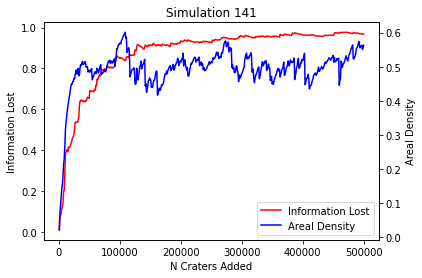

In [71]:
simulation_id = 141
df = stats_df[stats_df.simulation_id == simulation_id]
df.head()

print(df[["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage"]].iloc[0])

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_lost, color='red', label="Information Lost")
ax1.set_ylabel("Information Lost")
ax1.set_xlabel("N Craters Added")

ax2 = ax1.twinx()
plt2 = ax2.plot(df.n_craters_added_in_study_region, df.areal_density, color="blue", label="Areal Density")
ax2.set_ylabel("Areal Density")

lns = plt1 + plt2
ax1.legend(lns, [l.get_label() for l in lns], loc=4)

ax1.set_title(f"Simulation {simulation_id}")

slope                          3.027914
effective_radius_multiplier    1.503806
r_stat_multiplier              3.029372
min_rim_percentage             0.247500
Name: 38993, dtype: float64


Text(0.5, 1.0, 'Simulation 168')

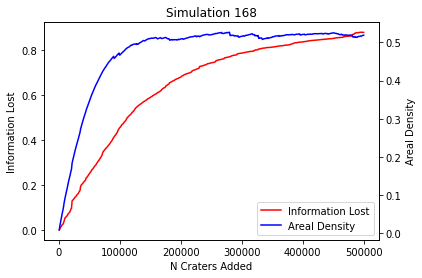

In [72]:
simulation_id = 168
df = stats_df[stats_df.simulation_id == simulation_id]
df.head()

print(df[["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage"]].iloc[0])

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_lost, color='red', label="Information Lost")
ax1.set_ylabel("Information Lost")
ax1.set_xlabel("N Craters Added")

ax2 = ax1.twinx()
plt2 = ax2.plot(df.n_craters_added_in_study_region, df.areal_density, color="blue", label="Areal Density")
ax2.set_ylabel("Areal Density")

lns = plt1 + plt2
ax1.legend(lns, [l.get_label() for l in lns], loc=4)

ax1.set_title(f"Simulation {simulation_id}")